The problem that is being tried to solve here is to identify the reasons for customer attrition also known as customer churning. This is a notebook which explores various machine learning algorithms to predict in a given set of conditions, whether a customer will stick with the company's services or discontinue it. The company's services that are being talked about here is Telco. Detailed explanation will be provided as we proceed step by step to achieve a good model which is able to correctly predict the stickiness of a customer with a compnay. 

In order to explore how churning works, there are two types of churning. One, which is involuntary churn which refers to customer's relocation to a place where the services may not be available, death, customer's relocation to a long term care facility. Two, voluntary churn, which refers to the customers changing the line of service due to reasons they find personally not satisfying with the one that extends their services to it. Involutary churns are usually not considered in analytical models and we explore the reasons and factors which influence voluntary churns. Now, that we have a context, let's proceed.

### The data defintion for the file which is being imported is as follows:

#### customerID:   Customer ID
#### gender: Whether the customer is a male or a female
#### SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
#### Partner: Whether the customer has a partner or not (Yes, No)
#### Dependents: Whether the customer has dependents or not (Yes, No)
#### tenure: Number of months the customer has stayed with the company
#### PhoneService: Whether the customer has a phone service or not (Yes, No)
#### MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
#### InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
#### OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
#### OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
#### DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
#### TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
#### StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
#### StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
#### Contract: The contract term of the customer (Month-to-month, One year, Two year)
#### PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
#### PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
#### MonthlyCharges: The amount charged to the customer monthly
#### TotalCharges: The total amount charged to the customer
#### Churn: Whether the customer churned or not (Yes or No)

# Obtain

Let us import in the following cell all the Python libraries that we will need to perform our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# looking at datatypes, observation counts and feature information
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
# Take a peek into the first 5 rows of the dataset.
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# finding general statistical information about the dataset to check for  anomalies
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In the dataset above, we see a lot of columns which are not numeric but have 2 or 3 categories and can be converted to numeric using various methods like numeric imputation or getting dummies. The 'SeniorCitizen' column is categorical (0 and 1) which is why the minimum is 0. The tenure displays the average tenure period that customers of this dataset have subscribed to as 32 months which is atleast a year and a half worth time of investment which broadly gives us a picture of how customers feel about Telco's services. If we observe, the column 'TotalCharges' even though it is numeric, is not being displayed above. We would have to convert it to numeric to see it's statistics. The monthly charges also average around 64 with the maximum being 118$ which doesn't show it has outliers per say. We will confirm this by plotting the boxplot distribution and calculating skew.

In [6]:
churn['TotalCharges'] = churn['TotalCharges'].astype(str)
churn['TotalCharges'] = churn['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
churn.dropna(inplace=True)
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'])

In [7]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# let us explore for nulls in the dataset
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# since we want to use classification models, we will  have to drop columns which add noise to the data, for example customerID
churn = churn.drop('customerID', axis=1)

In [11]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can explore for the other columns which have two values or more than two values to be encoded so that they can be used for classification. Before exploring the distribution, let us convert the non-numeric columns to numeric columns so that we can explore their distribution and collinearity with the target variable, which in this case is 'churn'

# Encoding

In [12]:
# let us convert the columns to lowercase to maintain consistency
churn.columns = churn.columns.str.lower()

Approach is to assign classes 0 and 1 for binary class columns such as gender, partner, dependents, phoneservice, onlinesecurity,
onlinebackup, deviceprotection, techsupport, streamingTV, streamingMovies, paperlessbilling

In [13]:
binary_cols =  ['gender','partner','dependents','phoneservice','paperlessbilling','churn']
for column in binary_cols:
    print(churn[column].value_counts())
    print('===========================')

Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: partner, dtype: int64
No     4933
Yes    2099
Name: dependents, dtype: int64
Yes    6352
No      680
Name: phoneservice, dtype: int64
Yes    4168
No     2864
Name: paperlessbilling, dtype: int64
No     5163
Yes    1869
Name: churn, dtype: int64


In [14]:
churn["gender"]= churn["gender"].replace('Male', 0)
churn['gender'] = churn['gender'].replace('Female',1)

In [15]:
yes_or_no_cols = ['partner','dependents','phoneservice','paperlessbilling','churn']
for column in yes_or_no_cols:
    churn[column] = churn[column].replace('Yes',1)
    churn[column] = churn[column].replace('No',0)

In [16]:
churn['monthlycharges'].value_counts()

20.05     61
19.85     44
19.90     44
19.95     44
19.65     43
19.70     42
20.00     42
19.55     40
20.15     40
19.75     39
20.35     38
20.25     38
19.80     38
20.10     37
19.60     37
20.20     35
19.50     32
19.40     31
20.45     31
20.40     30
19.45     28
20.50     28
20.30     28
20.55     27
19.35     25
19.30     24
20.65     23
25.25     20
25.10     19
19.25     18
          ..
34.85      1
66.00      1
30.85      1
45.50      1
23.50      1
56.50      1
111.35     1
92.65      1
48.45      1
113.45     1
21.45      1
103.35     1
40.45      1
34.60      1
78.25      1
48.20      1
86.95      1
112.90     1
23.05      1
67.05      1
76.30      1
93.05      1
101.70     1
77.30      1
64.25      1
92.35      1
35.60      1
72.85      1
67.70      1
113.30     1
Name: monthlycharges, Length: 1584, dtype: int64

In [17]:
churn.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


We can get dummies by using Panda's in-built get_dummies function to convert the other categorical variable having values more than 2. The only overhead in this technique is that it will lead to more addition of columns as it splits into n columns if the column has n values flagging 1 for the right split.

In [18]:
multiple_value = ['multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv',
                  'streamingmovies','contract','paymentmethod']
for col in multiple_value:
    print(churn[col].value_counts())
    print("=========================")

No                  3385
Yes                 2967
No phone service     680
Name: multiplelines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: internetservice, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: onlinesecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: onlinebackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: deviceprotection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: techsupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: streamingtv, dtype: int64
No                     2781
Yes                    2731
No internet service    1520
Name: streamingmovies, dtype: int64
Month-to-month    3875
Two year          1685
One year          1472
Name: contract, d

In [19]:
churn = pd.get_dummies(data=churn, columns=multiple_value)
churn.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,...,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


# Scrub and Explore

Since we have converted all the non-numeric columns to numeric ones, we can proceed to explore the distribution of different columns in forms of histograms, box plots and central moments. Once we explore, we can decide on whether there needs to be any transformation performed in order to get into a standard scale. Since, most of the machine learning algorithms are sensitive to outliers, outliers need to be carefully treated as they may compromise the accuracy of the model.

Let us look at the distribution of each feature

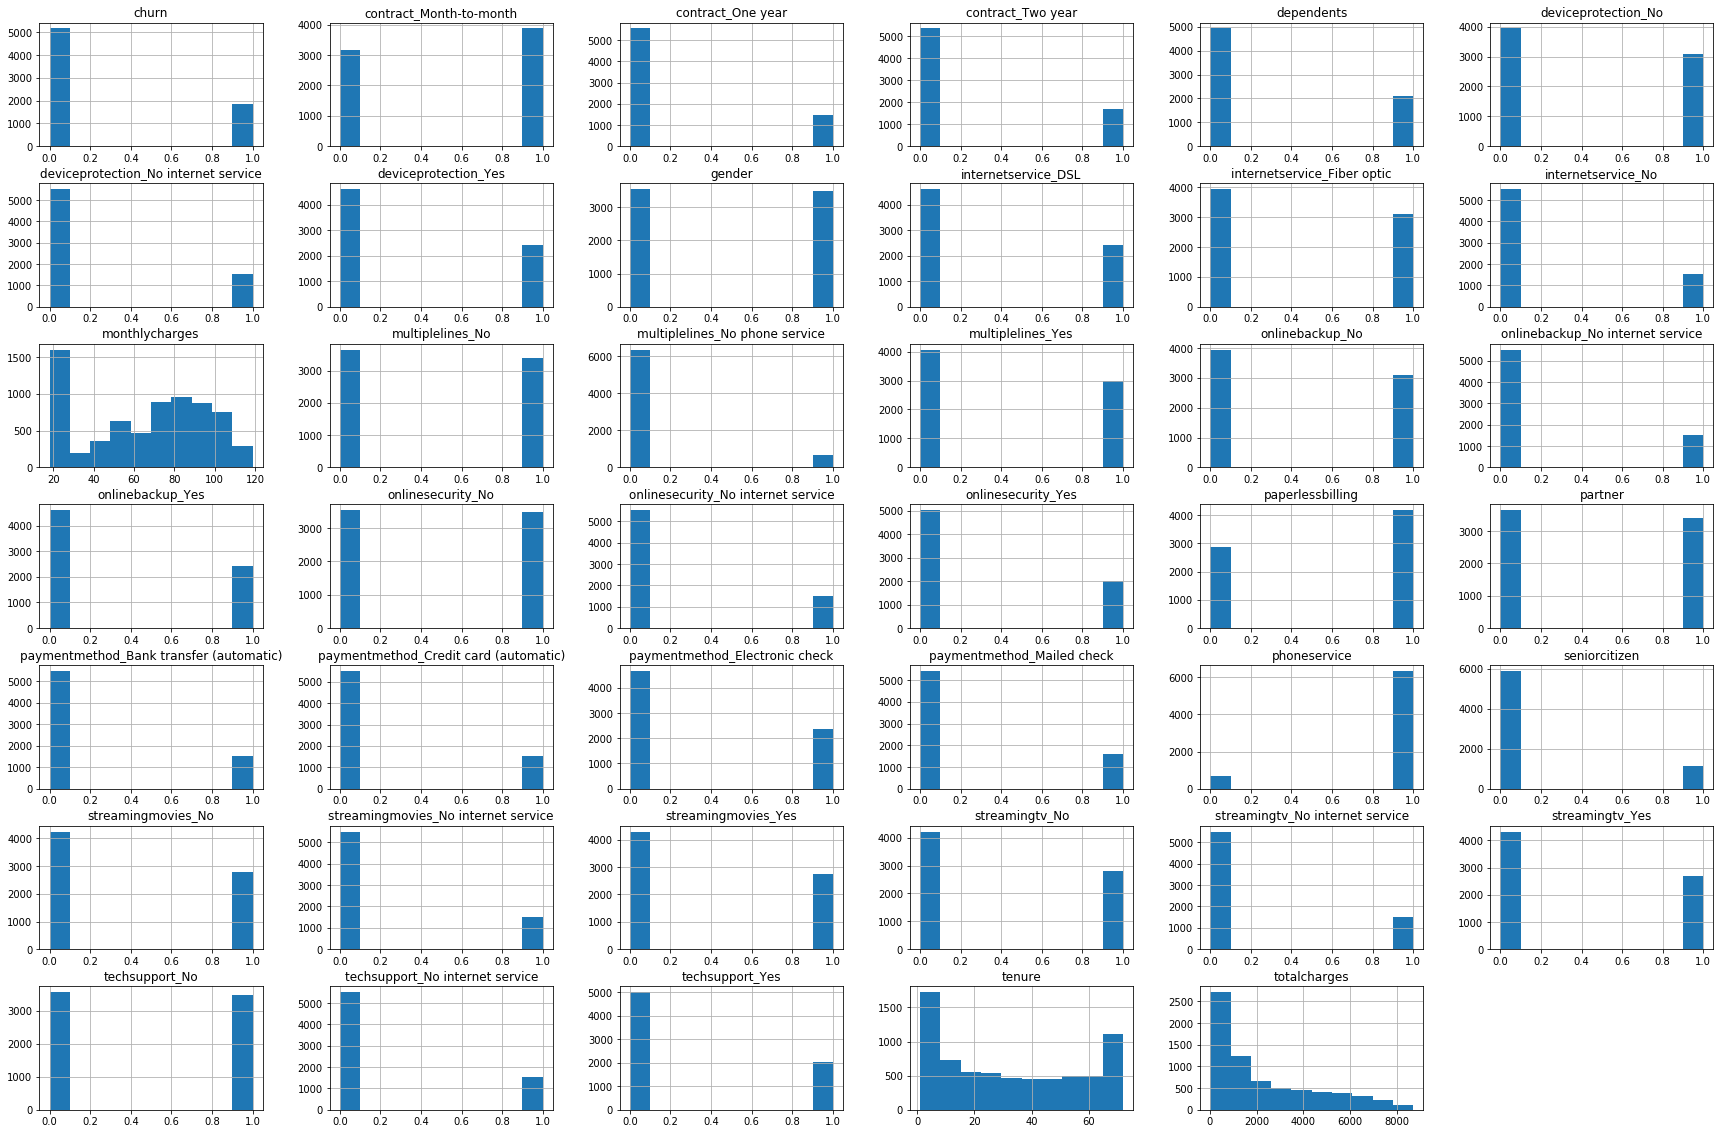

In [20]:
churn.hist(figsize=(30,20))
plt.show()

From the above distribution, we can observe that most of the columns have a higher inclination towards the value 0 which in encoded form translates to a 'No'. We can also see a lot of people who haven't left Telco as 0 means not churned whereas 1 means, they have been churned. The proportion of people who have been churned is quite imbalanced compared to people who were not churned. Some columns like paperlessbilling, phoneservice have higher 1's which seem to be columns of some importance. The tenure, monthlycharges are distributed throughout but the totalcharges column seems to be right skewed.

Now to visualize the correlation of the features to see if there are any additional features that can be eliminated.

Feature Exploration

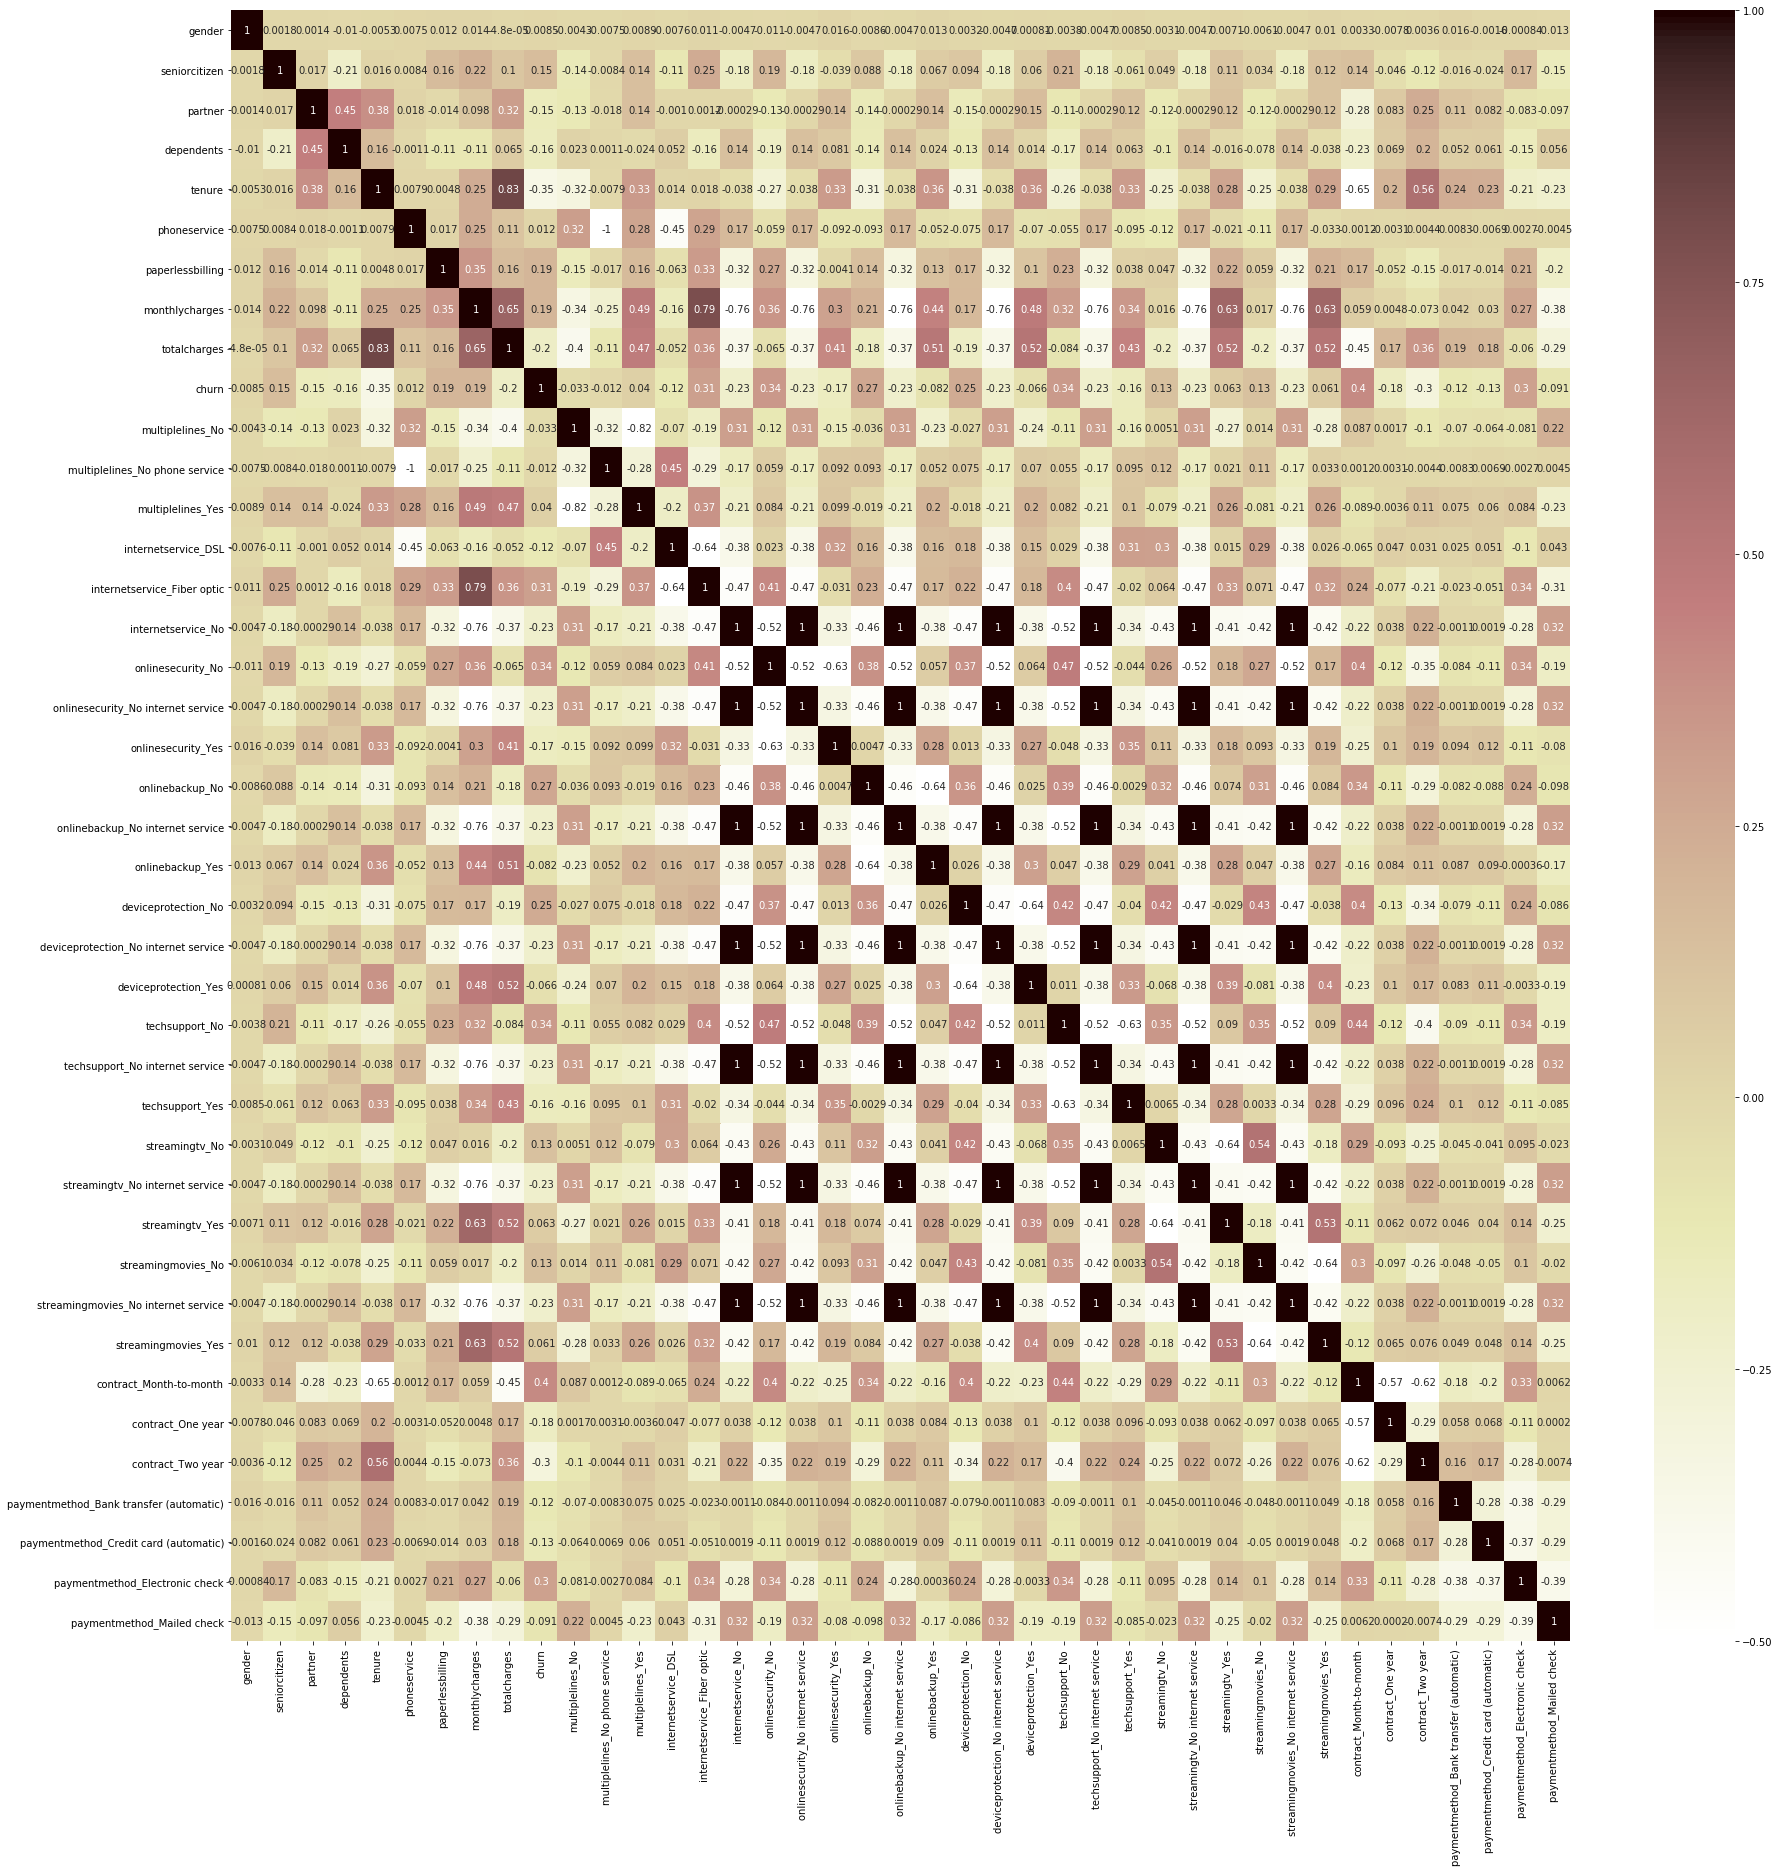

In [21]:
correlation = churn.corr()
plt.figure(figsize=(30,30))
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

Based on the above correlation plot, we can eliminate the feature Gender  based on it's collinearity with other features. Rest of the features seem to be co-linear with other columns which can be taken care of later using other methods which we will explore later. For now, let us drop the column gender and proceed.

In [22]:
churncols = churn.drop('gender',axis=1)

Let us proceed to check for outliers with boxplots. Splitting the boxplot viz into two parts due to a large number of columns

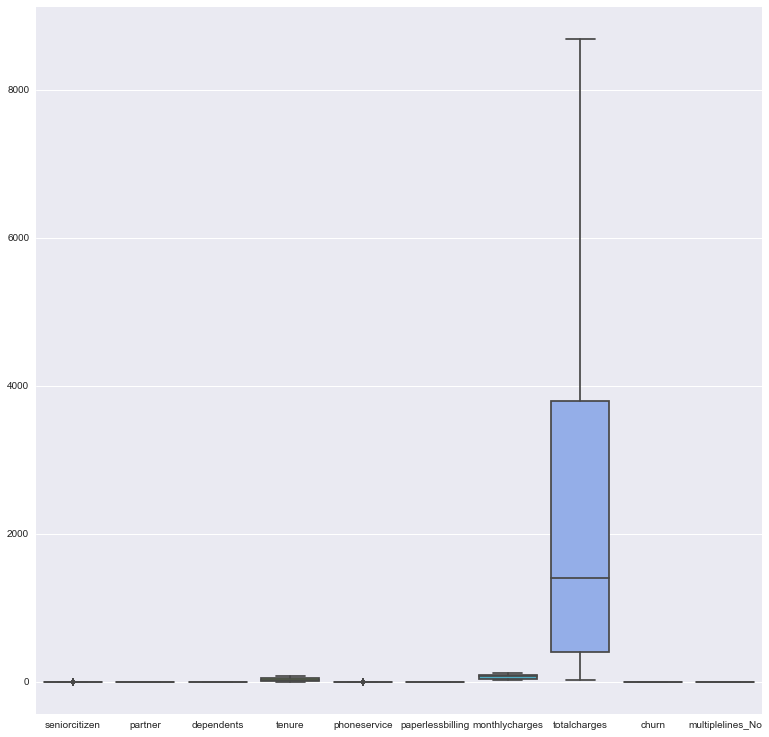

In [23]:
sns.set(rc={'figure.figsize':(13,13)})
sns.boxplot(data=churncols.iloc[:,0:10])

Fromt the above boxplots, the three columns which has continuous data (totalcharged, monthlycharges and tenure) do not seem to have any outliers. Hence, there is no need to standardize or transform the data to get into scale. The rest of the columns have just been encoded and it would be 0's and 1's for which we have already plotted the distribution.

In [24]:
# We can also cross check by calculating the skew of the three columns to see if they need normalization.
print('The skew of column {} is {}'.format('tenure', churncols['tenure'].skew()))
print('The skew of column {} is {}'.format('monthlycharges', churncols['monthlycharges'].skew()))
print('The skew of column {} is {}'.format('totalcharges', churncols['totalcharges'].skew()))

The skew of column tenure is 0.23773083190513133
The skew of column monthlycharges is -0.22210292770166232
The skew of column totalcharges is 0.9616424997242504


Let us explore the number of instances where customers have been churned.

In [25]:
churned_customers = (churncols.churn == 1).sum()
print('Number of churned customers is {}'.format(churned_customers))
print('The percentage of churned customers are {}%'.format((churned_customers/len(churncols))*100))

Number of churned customers is 1869
The percentage of churned customers are 26.578498293515356%


About 30% of the customers have left Telco's service which cannot be called as quite imbalanced but we will still try solving the problem using class balancing to see if the accuracy of the model increases or not. Let us proceed to modelling now that we have understood how the features are distributed.

In [26]:
target = churncols.churn

In [27]:
features = churncols.drop(['churn'],axis=1)

Let us proceed to see to fit our initial model.

# Model

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (features,target, random_state=0)

A good way to visualize our accuracy through a logistic regression model is by looking at the Recursive Operating Characteristic (ROC) curve of the model.

AUC: 0.8365636150487102


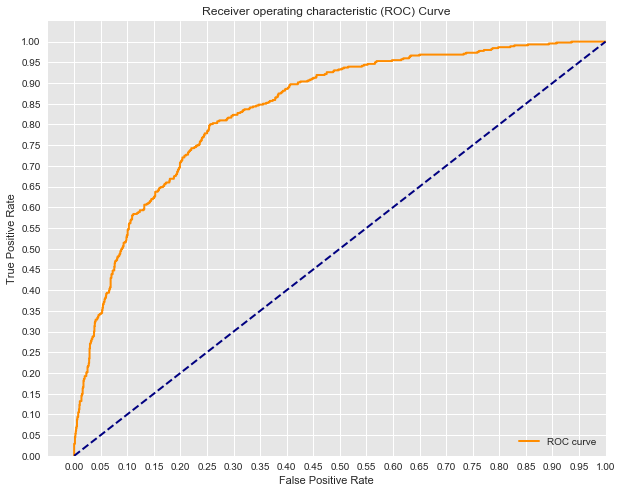

In [29]:
from sklearn.metrics import roc_curve, auc

#Initial Model
logreg = LogisticRegression(fit_intercept = False)

#Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#Visualization for ROC curve
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

We can create a confusion matrix to check the predictability of the model by visualizing the True and False Positives and Negatives predicted by the model.

In [30]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1179  205]
 [ 132  242]]


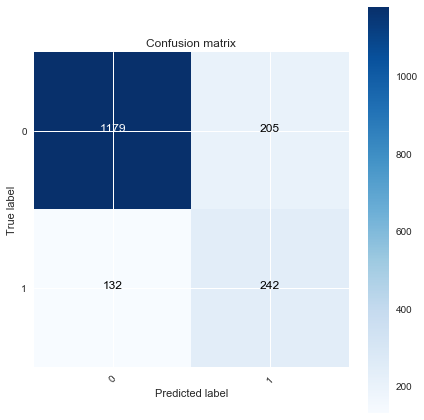

In [31]:
y_hat_test = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Also, let's look at the precision, recall and f-score for this model

In [32]:
from sklearn.metrics import precision_recall_fscore_support
results = precision_recall_fscore_support(y_hat_test,y_test)
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.8993135 , 0.54138702]),
 array([0.85187861, 0.64705882]),
 array([0.87495362, 0.58952497]),
 array([1384,  374], dtype=int64))

As we can see, the precision of class 0 (where customers haven't left) is about 89.23% and the precision of class 1(where customers have left) is about 54%. 

In our case of predicting customers who will churn, the basic idea is to flag whenever we see a sign of customer about to churn because losing customers is loss to Telco and therefore a high recall rate is preferred. Let us check for other methods whether we can achieve the same results without sampling.

Let us try Recursive Feature Elimination to rank features on this model.

In [33]:
from sklearn.feature_selection import RFE
predictors=features
selector = RFE(logreg, n_features_to_select = 1)
selector = selector.fit(predictors, target)

In [34]:
selector.ranking_

array([28, 38, 18, 34, 14, 16, 37, 39, 33, 15, 35,  5, 25, 11, 30,  9,  7,
       36,  6, 12, 29,  4, 23, 32,  3, 10, 24, 17, 26, 22, 19, 27, 13,  2,
        1, 21, 20,  8, 31])

In [35]:
feature_ranks = []
for i in selector.ranking_:
    feature_ranks.append(f"{i} {churncols.columns[i]}")
feature_ranks

['28 streamingtv_No internet service',
 '38 paymentmethod_Electronic check',
 '18 onlinebackup_No',
 '34 contract_One year',
 '14 internetservice_No',
 '16 onlinesecurity_No internet service',
 '37 paymentmethod_Credit card (automatic)',
 '39 paymentmethod_Mailed check',
 '33 contract_Month-to-month',
 '15 onlinesecurity_No',
 '35 contract_Two year',
 '5 paperlessbilling',
 '25 techsupport_No internet service',
 '11 multiplelines_Yes',
 '30 streamingmovies_No',
 '9 multiplelines_No',
 '7 totalcharges',
 '36 paymentmethod_Bank transfer (automatic)',
 '6 monthlycharges',
 '12 internetservice_DSL',
 '29 streamingtv_Yes',
 '4 phoneservice',
 '23 deviceprotection_Yes',
 '32 streamingmovies_Yes',
 '3 tenure',
 '10 multiplelines_No phone service',
 '24 techsupport_No',
 '17 onlinesecurity_Yes',
 '26 techsupport_Yes',
 '22 deviceprotection_No internet service',
 '19 onlinebackup_No internet service',
 '27 streamingtv_No',
 '13 internetservice_Fiber optic',
 '2 dependents',
 '1 partner',
 '21 d

In [36]:
features.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,multiplelines_No,multiplelines_No phone service,...,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,1,0,0,1,0,0,0,0,1,0


### Random Forest

Confusion matrix, without normalization
[[1177  242]
 [ 134  205]]


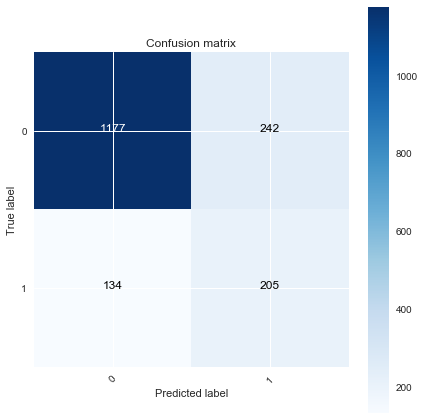

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(features,target, random_state=0)
#Initial Model
ranfor = RandomForestClassifier()
#Probability scores for test set
y_score = ranfor.fit(X_train, y_train)
pred = ranfor.predict(X_test)
y_hat_test = ranfor.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [38]:
ranfor.score(X_train, y_train)

0.9787637466818354

In [39]:
ranfor.score(X_test, y_test)

0.7861205915813424

In [40]:
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.89778795, 0.45861298]),
 array([0.82945736, 0.60471976]),
 array([0.86227106, 0.5216285 ]),
 array([1419,  339], dtype=int64))

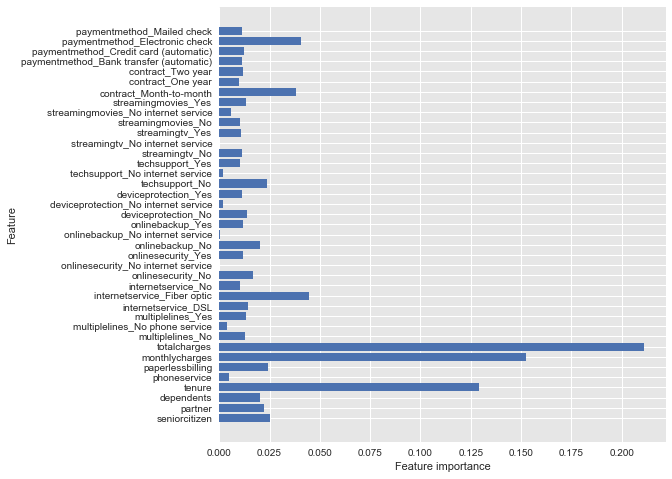

In [41]:
#returns column names to converted array from standardscaler so that visualiztaion will be proerly labeled
X_imputed_df = pd.DataFrame(X_train, columns = features.columns)

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_imputed_df.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(ranfor)

We can see from our visualization that there are definitely some features that are more important than others. We will reduce features before retesting the model.

### XGBoost

In [42]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features,target, random_state=0)
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
training_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 81.93%
Validation accuracy: 81.17%


Confusion matrix, without normalization
[[1199  219]
 [ 112  228]]


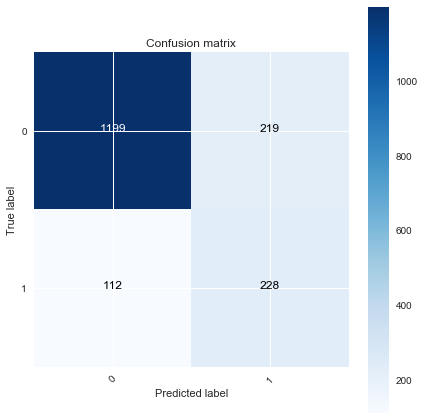

In [43]:
y_hat_test = xgb.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [44]:
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.91456903, 0.51006711]),
 array([0.84555712, 0.67058824]),
 array([0.87871015, 0.5794155 ]),
 array([1418,  340], dtype=int64))

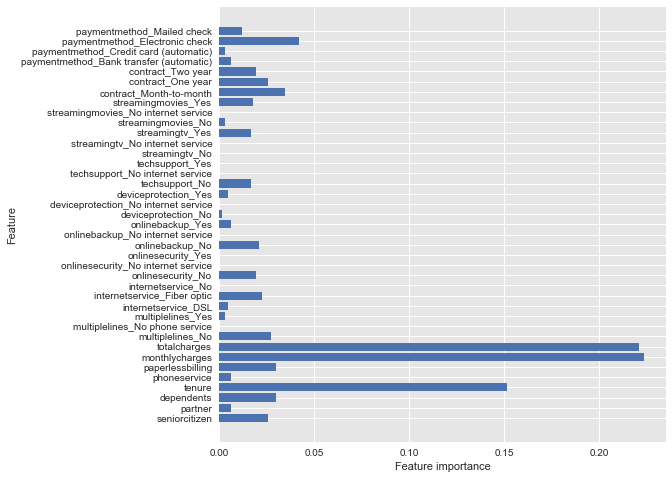

In [45]:
plot_feature_importances(xgb)

Since, we are concerned in this particular problem to have a high recall value, XGBoost gives us the highest recall of 67%. Let us reduce the dimensions by using features which represent 90% of the data. We should also sample the data for using balanced data.

In [46]:
lr_reduced_space = churncols[['streamingtv_No internet service', 'paymentmethod_Electronic check', 'onlinebackup_No', 
                                                  'contract_One year', 'internetservice_No', 'onlinesecurity_No internet service', 
                                                     'paymentmethod_Credit card (automatic)','paymentmethod_Mailed check','churn']]

lrfeatures = lr_reduced_space.drop(labels=['churn'], axis=1)
lrfeatures = lrfeatures.values
lrtarget = churncols['churn'].values

In [47]:
rf_reduced_space = churncols[['tenure', 'paperlessbilling', 'monthlycharges', 'totalcharges', 'internetservice_Fiber optic', 
                              'onlinesecurity_No', 'techsupport_No', 'contract_Month-to-month', 'contract_Two year', 
                              'paymentmethod_Electronic check','churn']]
rffeatures = rf_reduced_space.drop(labels=['churn'], axis=1)
rffeatures = rffeatures.values
rftarget = rf_reduced_space['churn'].values

In [48]:
xgb_reduced_space = churncols[['tenure', 'paperlessbilling', 'monthlycharges', 'totalcharges', 'internetservice_Fiber optic', 
                              'onlinesecurity_No', 'techsupport_No', 'contract_Month-to-month', 'contract_Two year', 
                              'paymentmethod_Electronic check','churn']]
xgbfeatures = xgb_reduced_space.drop(labels=['churn'], axis=1)
xgbfeatures = xgbfeatures.values
xgbtarget = xgb_reduced_space['churn'].values

### Hyperparameter Tuning with GridSearch

We will also perform hyperparameter tuning based on our reduced datasets using GridSearch for each model. This will entail setting grid parameters for each model to be tuned.

We will start with the Logistic Regression model. The values to look at will be the 'C' value and the penalty type.

In [49]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
#logistic regression parameter settings
lr_param_grid = {
    'C': [.0001, .001, .1, 1, 10],
    'penalty': ['l1', 'l2'],
}

In [51]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(fit_intercept=False)
from sklearn.model_selection import GridSearchCV
lr_grid_search = GridSearchCV(logreg, lr_param_grid, cv=3)
lr_grid_search.fit(lrfeatures, lrtarget)
print("Best Parameter Combination Found During Grid Search:")
lr_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'C': 0.0001, 'penalty': 'l1'}

For the random forest model, the hyperparameters to test are n_estimators, criterion, max_depth, min_samples_split and min_samples_leaf.

In [52]:
#random forest parameter settings
rf_param_grid = {
    'n_estimators': [200, 300],
    'criterion': ['gini'],
    'max_depth': [10, 13],
    'min_samples_split': [20,30],
    'min_samples_leaf': [8, 10]
}

In [53]:
rf_grid_search = GridSearchCV(ranfor, rf_param_grid, cv=3, return_train_score=True, n_jobs=-1)
rf_grid_search.fit(rffeatures, rftarget)
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 300}

For the XGBoost model, we will test the learning_rate, max_depth, min_child_weight and n_estimators hyperparameters.

In [54]:
#xgboost parameter settings
xgb_param_grid = {
    "learning_rate": [0.1,0.5,1.0],
    'max_depth': [1,3,6],
    'min_child_weight': [1,10,100],
    'n_estimators': [50, 100, 200],
}

In [55]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=3, return_train_score=True, n_jobs=-1)
xgb_grid_search.fit(xgbfeatures, xgbtarget)
print("Best Parameter Combination Found During Grid Search:")
xgb_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 100,
 'n_estimators': 50}

## Model Retesting with Tuned Hyperparameters

Now that we have our GridSearch combinations that best fit with our dimensionally reduced and scaled data, we will rerun all of our models with the tuned parameters and recheck our scores.

## Logistic Regression Retest

AUC: 0.7283218746213846


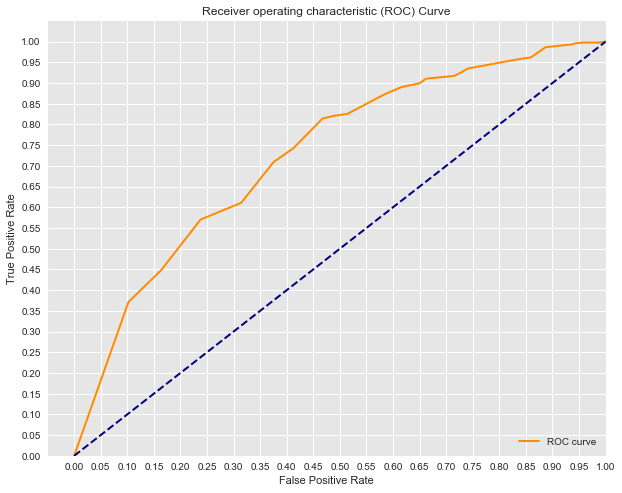

In [56]:
X_train, X_test, y_train, y_test = train_test_split(lrfeatures,lrtarget, random_state=0)
logreg2 = LogisticRegression(C = 0.1, penalty='l2', fit_intercept=False)
#Probability scores for test set
y_score = logreg2.fit(X_train, y_train).decision_function(X_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
y_hat_test = logreg2.predict(X_test)
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.76201373, 0.5704698 ]),
 array([0.83879093, 0.44973545]),
 array([0.79856115, 0.50295858]),
 array([1191,  567], dtype=int64))

Confusion matrix, without normalization
[[999 192]
 [312 255]]


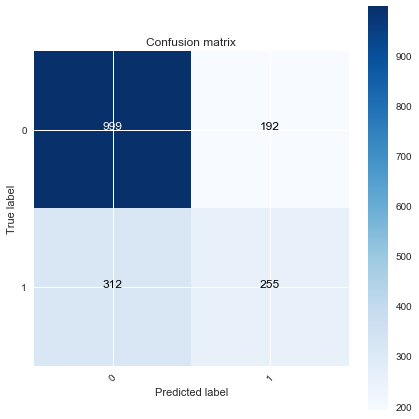

In [58]:
y_hat_test = logreg2.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

The accuracy drops and it performs poorly. There is no True Negative predictions at all. Hence, we can safely discard using a reduced dimension space with Logistic Regression and the tuned hyperparameters or use a larger dimension to get a previously achieved accuracy of 83%.

# Random Forest Retest

Confusion matrix, without normalization
[[1196  222]
 [ 115  225]]


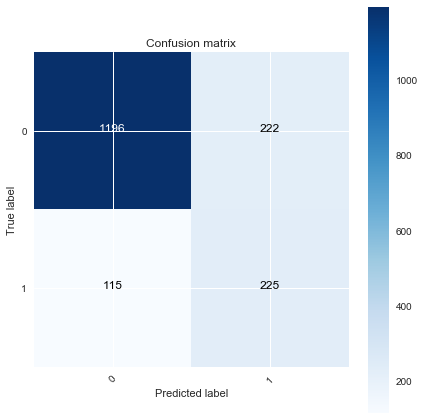

In [59]:
X_train, X_test, y_train, y_test = train_test_split(rffeatures,rftarget, random_state=0)
#Initial Model
ranfor2 = RandomForestClassifier(n_estimators=200, criterion = 'gini', max_depth = 10, min_samples_split = 20, min_samples_leaf = 10)
#Probability scores for test set
y_score = ranfor2.fit(X_train, y_train)
pred = ranfor2.predict(X_test)
y_hat_test = ranfor2.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [60]:
ranfor2.score(X_train, y_train)

0.8310580204778157

In [61]:
ranfor2.score(X_test, y_test)

0.8083048919226393

In [62]:
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.9122807, 0.5033557]),
 array([0.84344147, 0.66176471]),
 array([0.87651154, 0.57179161]),
 array([1418,  340], dtype=int64))

Random Forest is a win here because it gives a better recall score for the negative class with a good training and testing score. This model is trained on just 8 features which performs excellent.

# XGBoost Retest

In [63]:
{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 100,
 'n_estimators': 50}

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 100,
 'n_estimators': 50}

In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xgbfeatures,xgbtarget, random_state=0)
xgb2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, min_child_weight=100, n_estimators=50)
xgb2.fit(X_train, y_train)
training_preds = xgb2.predict(X_train)
val_preds = xgb2.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 80.89%
Validation accuracy: 80.83%


Confusion matrix, without normalization
[[1189  215]
 [ 122  232]]


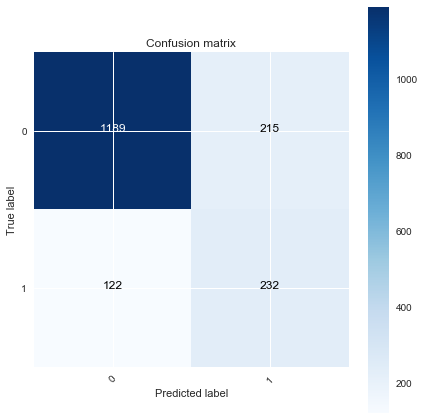

In [65]:
y_hat_test = xgb2.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [66]:
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.90694127, 0.51901566]),
 array([0.8468661 , 0.65536723]),
 array([0.87587477, 0.57927591]),
 array([1404,  354], dtype=int64))

Even XGB gives a similar performance with a reduced feature space with tuned hyperparameters. Either RF or XBG can be used for production. These models have been trained under the pretext of not sampling the non-dominant class which achieves an average accuracy of 80% in training and testing time. One more thing to observe is the features that all the three algorithms use. Variables like monthlycharges, totalcharges and tenure are common in both RF and XGB which prove to be a huge factor to influence churning. These variables are not ranked high in logistic regression.

# Further Steps

Explore the entire dataset using SMOTE and other sampling techniques because we want to reduce the number of False Negatives as the model should not predict 0 (no churn) when customers are actually getting churned (1).